In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def distances(data):
    dist_mat = np.matrix(np.zeros((data.shape[0],data.shape[0])))
    for i in range(data.shape[0]):
         a = data - data.loc[i]
         dist_mat[i,:] = np.linalg.norm(a, axis=1)
    return dist_mat

In [4]:
def K_nearest(K_near, dist_mat):
    K_mat = dist_mat.copy()
    for i in range(dist_mat.shape[0]):
        K_mat[i,:] = np.zeros((dist_mat.shape[1]))
        rev_sort = np.argsort(dist_mat[i,:])
        max_val_loc = rev_sort[0,-K_near:].tolist()
        K_mat[i,max_val_loc] = dist_mat[i,max_val_loc]
    return K_mat 

In [5]:
def spectral_cluster(data,sigma,k, K_near):
    dist_mat = distances(data)
    a = 2*(np.power(sigma,2))
    W_ = np.exp(-((np.power(dist_mat,2)/a)))
    W_ = W_-np.eye(W_.shape[0])
    K_mat = K_nearest(K_near, W_)
    K_mat = K_nearest(K_near, K_mat.T).T
    cond_T = np.multiply((K_mat == np.zeros(K_mat.shape)).astype(int),K_mat.T)
    W_ = K_mat + cond_T
    D = np.matrix(np.zeros(W_.shape))
    for i in range(W_.shape[0]):
        D[i,i] = np.sum(W_[i,:])
    L = D-W_
    eig_val, eig_vect = np.linalg.eig(L)
    index_arr = np.argsort(eig_val)
    var = eig_val[index_arr]
    eig_vect = eig_vect[:,index_arr]
    data_new = pd.DataFrame(eig_vect[:,:k])
    
    return data_new 

In [18]:
def voronoi(data, centroid):
    C = []
    for i in range(data.shape[0]):
        min_dist = 100000
        
        for j in range(centroid.shape[0]):
            a = data.iloc[i,:] - centroid.iloc[j,:]
            dist = np.linalg.norm(a) # gives 2 norm for the elements of list
            if (dist < min_dist):
                min_id = j
                min_dist = dist
        C.append(min_id)
    return C     

In [19]:
def cluster_cen(data,C):
    X = data.copy()
    X["C"] = C
    new_cen = X.groupby(["C"]).mean()
    return new_cen

In [20]:
def cost(data, C, centroid):
    tot_dist = 0
    for i in range(data.shape[0]):
        a = data.iloc[i,:] - centroid.iloc[C[i],:]
        tot_dist += (np.linalg.norm(a))**2
    return tot_dist

In [21]:
def k_means(data,k):
    centroid = data.sample(k)
    cen_diff = 10
    while(np.linalg.norm(cen_diff) > 0):
        C = voronoi(data, centroid)
        new_cen = cluster_cen(data,C)
        cen_diff = []
        for i in range(centroid.shape[0]):
            temp = new_cen.iloc[i,:] - centroid.iloc[i,:]
            cen_diff = temp
        centroid = new_cen
    price = cost(data, C, centroid)
    return C, centroid, price

In [22]:
data1 = pd.read_csv(f"Shape CSV.csv", header = None)
new_data = spectral_cluster(data1,0.1,4,100)
C, centroid, price = k_means(new_data,4)

In [23]:
centroid

,0,1,2,3
C,,,,
0,0.025802,0.013536,3.059832e-04,0.013349
1,0.000002,-0.000048,3.161447e-02,-0.000372
2,-0.012293,0.022798,3.269987e-07,0.000018
3,0.011586,0.006668,-6.600171e-04,-0.028789


In [24]:
# C

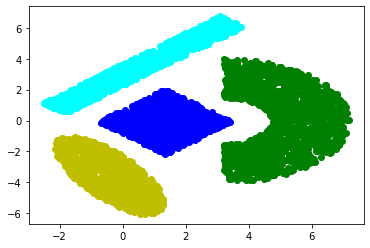

In [25]:
color = ['y', 'blue', 'green', 'cyan', 'black', 'brown']
for m in range(len(color)):
    id = []
    for i in range(len(C)):
        if (C[i] == m):
            id.append(i)
    plt.scatter(data1.loc[id][0],data1.loc[id][1], c = color[m])

In [28]:
data2 = pd.read_csv(f"clustering.csv", header = None)
new_data1 = spectral_cluster(data2,0.5,2,50)
C1, centroid, price = k_means(new_data1,2)

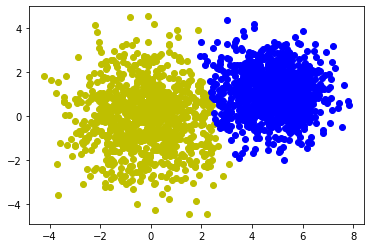

In [29]:
color = ['y', 'blue', 'green', 'cyan', 'black', 'brown']
for m in range(len(color)):
    id = []
    for i in range(len(C1)):
        if (C1[i] == m):
            id.append(i)
    plt.scatter(data2.loc[id][0],data2.loc[id][1], c = color[m])